In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_folder = "/content/drive/MyDrive/train/"
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/haarcascade_frontalface_default.xml")
categories = ["yawn", "no_yawn"]

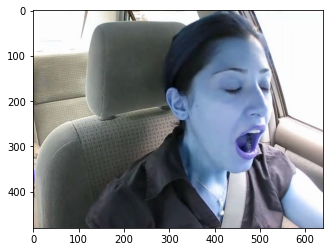

In [4]:
test_image = cv2.imread(train_folder+"/yawn/1.jpg",cv2.IMREAD_COLOR)
plt.imshow(test_image)
plt.show()

In [5]:
test_image.shape

(480, 640, 3)

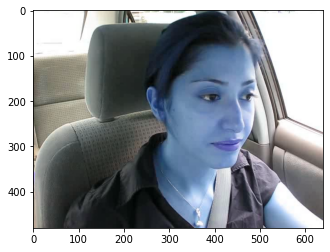

In [6]:
test_image = cv2.imread(train_folder+"/no_yawn/1.jpg",cv2.IMREAD_COLOR)
plt.imshow(test_image)
plt.show()

In [7]:
test_image.shape

(480, 640, 3)

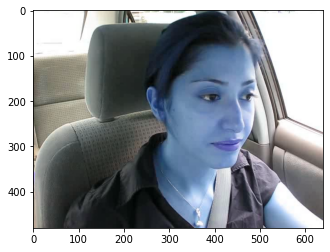

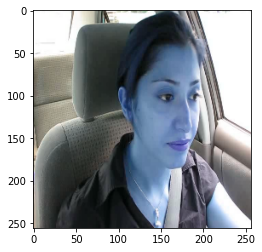

In [8]:
image_array = cv2.imread(train_folder+"/no_yawn/1.jpg",cv2.IMREAD_COLOR)
resized_array = cv2.resize(image_array, (256, 256))
plt.imshow(test_image)
plt.show()
X = np.array(resized_array)
X = X.reshape(-1, 256, 256, 3)
plt.imshow(X[0])
plt.show()

In [9]:
yawn = []
label = []
for category in categories:
  images_folder = train_folder+"/"+category
  for img in os.listdir(images_folder):
    image_array = cv2.imread(images_folder+"/"+img, cv2.IMREAD_COLOR)
    resized_array = cv2.resize(image_array, (256, 256))
    yawn.append(resized_array)
    label.append(category)

In [10]:
from sklearn.preprocessing import LabelBinarizer
X = np.array(yawn)
X = X.reshape(-1, 256, 256, 3)
label_bin = LabelBinarizer()
y = label_bin.fit_transform(label)
y = np.array(y)

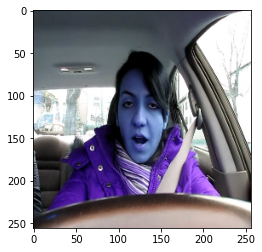

In [11]:
plt.imshow(X[0])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [13]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
X_train.shape[1:]

(256, 256, 3)

In [14]:
#1 - yawn 0 - no_yawn
def prepare(filepath):
  img_array = cv2.imread(filepath, cv2.COLOR_BGR2RGB)
  resized_array = img_array / 255
  resized_array = cv2.resize(resized_array, (256, 256))
  plt.imshow(resized_array)
  plt.show()
  return resized_array.reshape(-1, 256, 256, 3)

In [15]:
test_model = Sequential()
test_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(256,256,3)))
test_model.add(LeakyReLU(alpha=0.1))
test_model.add(MaxPooling2D((2, 2),padding='same'))
test_model.add(Dropout(0.25))
test_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
test_model.add(LeakyReLU(alpha=0.1))
test_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
test_model.add(Dropout(0.25))
test_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
test_model.add(LeakyReLU(alpha=0.1))                  
test_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
test_model.add(Dropout(0.4))
test_model.add(Flatten())
test_model.add(Dense(128, activation='linear'))
test_model.add(LeakyReLU(alpha=0.1))           
test_model.add(Dropout(0.3))
test_model.add(Dense(2, activation='softmax'))

In [16]:
test_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"], optimizer='adam')

test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 64)      0         
                                                        

In [17]:
history = test_model.fit(train_generator, epochs=50, validation_data=test_generator,validation_steps=len(test_generator),shuffle=True)

Epoch 1/50
32/32 [==============================] - 22s 404ms/step - loss: 1.7234 - accuracy: 0.5824 - val_loss: 0.6809 - val_accuracy: 0.8667
Epoch 2/50
32/32 [==============================] - 13s 403ms/step - loss: 0.6938 - accuracy: 0.4719 - val_loss: 0.6759 - val_accuracy: 0.8230
Epoch 3/50
32/32 [==============================] - 13s 404ms/step - loss: 0.6761 - accuracy: 0.4294 - val_loss: 0.6647 - val_accuracy: 0.8437
Epoch 4/50
32/32 [==============================] - 14s 425ms/step - loss: 0.6574 - accuracy: 0.5637 - val_loss: 0.6340 - val_accuracy: 0.6253
Epoch 5/50
32/32 [==============================] - 13s 412ms/step - loss: 0.6424 - accuracy: 0.5893 - val_loss: 0.5854 - val_accuracy: 0.6874
Epoch 6/50
32/32 [==============================] - 13s 409ms/step - loss: 0.6163 - accuracy: 0.5518 - val_loss: 0.7174 - val_accuracy: 0.0736
Epoch 7/50
32/32 [==============================] - 13s 407ms/step - loss: 0.6213 - accuracy: 0.6456 - val_loss: 0.9110 - val_accuracy: 0.0253

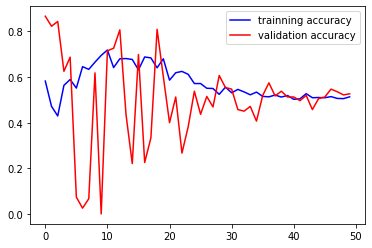

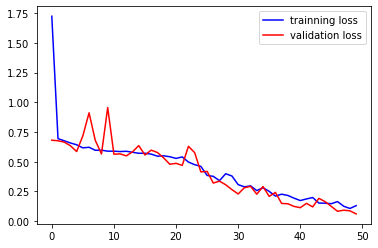

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [19]:
test_model.save("/content/drive/MyDrive/train/test_drowsiness_only_yawn_sigmoid_12_14.h5")
test_model.save("/content/drive/MyDrive/train/test_drowsiness_only_yawn_sigmoid_12_14.model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/train/test_drowsiness_only_yawn_sigmoid_12_14.model/assets


In [20]:
test_model = tf.keras.models.load_model("/content/drive/MyDrive/train/test_drowsiness_only_yawn_sigmoid_12_14.h5")

In [21]:
test_loss, test_acc = test_model.evaluate(X_test,  y_test, verbose=2)

14/14 - 0s - loss: 109.5615 - accuracy: 0.3379 - 329ms/epoch - 24ms/step


In [22]:
prediction_classes = test_model.predict(X_test)
predicted_classes = np.argmax(prediction_classes,axis=1)
predicted_classes.shape, y_test.shape
correct = 0
in_correct = 0
for i in range(0,435):
  if predicted_classes[i] == y_test[i][0]:
    correct += 1
  else:
    in_correct += 1
print("Found %d correct labels" % correct)
print("Found %d in correct labels" % in_correct)

Found 329 correct labels
Found 106 in correct labels
